# Caffe Neural Net Implementation

Model to Emulate: Faster-RCNN  
Sub-Model: Shallow structure originally used for COCO Dataset  
Location: C:\Users\Dallas\Documents\GitHub\py-faster-rcnn\models\coco\VGG_CNN_M_1024\faster_rcnn_end2end

### Load Training Model

In [2]:
import caffe

In [1]:
import _init_paths
from fast_rcnn.train import get_training_roidb, train_net
from fast_rcnn.config import cfg, cfg_from_file, cfg_from_list, get_output_dir
from datasets.factory import get_imdb
from rpn.generate import imdb_proposals
import argparse
import pprint
import numpy as np
import sys, os
import multiprocessing as mp
import cPickle
import shutil

ImportError: No module named _init_paths

In [3]:
caffe.set_mode_gpu()

In [5]:
#Build neural net from prototext file
net = caffe.Net('sample.prototxt', caffe.TEST)

In [6]:
print net.inputs

# Display out layers with respective shapes
[(k, v.data.shape) for k, v in net.blobs.items()]

['data']


[('data', (1L, 1L, 100L, 100L)), ('conv', (1L, 3L, 96L, 96L))]

In [7]:
# Display weight & bias parameters
[(k, v[0].data.shape, v[1].data.shape) for k, v in net.params.items()]

[('conv', (3L, 1L, 5L, 5L), (3L,))]

In [8]:
print net.blobs['conv'].data.shape

(1L, 3L, 96L, 96L)


### Draw Neural Network

Drawing net to my_net.png


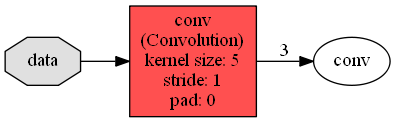

In [14]:
# Draw script: C:\Users\Dallas\DataScience\caffe-master\Build\x64\Release\pycaffe\draw_net.py
# Net file : C:\Users\Dallas\OneDrive\MSBA Program\Fall 2016 Courses\Adv Predictive Modeling\APM-Project\Code\sample.prototxt
# Net file: C:\Program Files\caffe-master\examples\net_surgery\conv.prototxt

! python "C:\Users\Dallas\DataScience\caffe-master\Build\x64\Release\pycaffe\draw_net.py"\
         "C:\Users\Dallas\OneDrive\MSBA Program\Fall 2016 Courses\Adv Predictive Modeling\APM-Project\Code\sample.prototxt"\
          my_net.png

I_Image(filename = "my_net.png")

### Load & Prepare Training Data

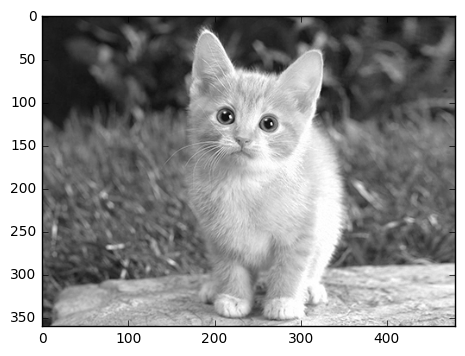

In [15]:
im = np.array(Image.open('C:\Users\Dallas\DataScience\caffe-master\examples\images\cat_gray.jpg'))
plt.imshow(im,cmap = 'gray')
plt.show()

In [16]:
#Reshape the data blob (1, 1, 100, 100) to the new size (1, 1, 360, 480) to fit the image
im_input = im[np.newaxis, np.newaxis, :, :]
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input

net.blobs['data'].data.shape

(1L, 1L, 360L, 480L)

In [17]:
#Compute blobs given input
net.forward()

{'conv': array([[[[ -1.66756499,  -1.66783559,  -1.58292437, ...,  -3.55817294,
            -3.39870834,  -3.4296453 ],
          [ -1.55437529,  -1.70031404,  -1.67745936, ...,  -3.79975438,
            -3.69375873,  -3.6468358 ],
          [ -1.5822506 ,  -1.59476066,  -1.6557864 , ...,  -4.04111195,
            -4.06895971,  -3.91617846],
          ..., 
          [ -2.41775131,  -2.35001159,  -2.36837029, ..., -11.547019  ,
           -11.45924473, -12.495224  ],
          [ -2.56029081,  -2.66430259,  -2.63905001, ..., -13.41671848,
           -11.79421043, -11.54947853],
          [ -2.73053551,  -2.84483218,  -2.9317677 , ..., -14.18416691,
           -12.27203941, -11.26710224]],
 
         [[  2.90154004,   2.99595404,   2.96785426, ...,   5.6633029 ,
             5.65955353,   5.73195648],
          [  2.90733027,   2.84781408,   2.88298798, ...,   6.05359936,
             5.97663212,   6.09747124],
          [  2.96020508,   2.95447421,   2.92518735, ...,   6.41000605,
     

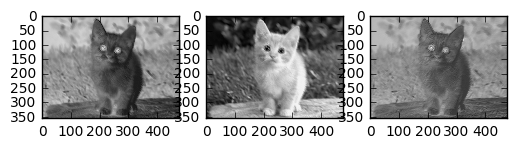

In [18]:
#Print convolutions
for i in range(3):
    plt.subplot(1, 3, i+1), plt.imshow(net.blobs['conv'].data[0,i], cmap = 'gray')

plt.show()

### Download & Run Pre-Trained Model

In [ ]:
# Download Model script: C:/Program Files/caffe-master/scripts/download_model_binary.py
# Download Model script from Gist: C:/Program Files/caffe-master/scripts/download_model_from_gist.sh
# Script location for model of interest: C:/Program Files/caffe-master/data/ilsvrc12/get_ilsvrc_aux.sh
# Location to save pre-trained model: C:/Program Files/caffe-master/models/bvlc_reference_caffenet

! python "C:/Users/Dallas/DataScience/caffe-master/scripts/download_model_binary.py" "C:/Users/Dallas/DataScience/caffe-master/models/bvlc_reference_caffenet" 

Drawing net to my_net2.png


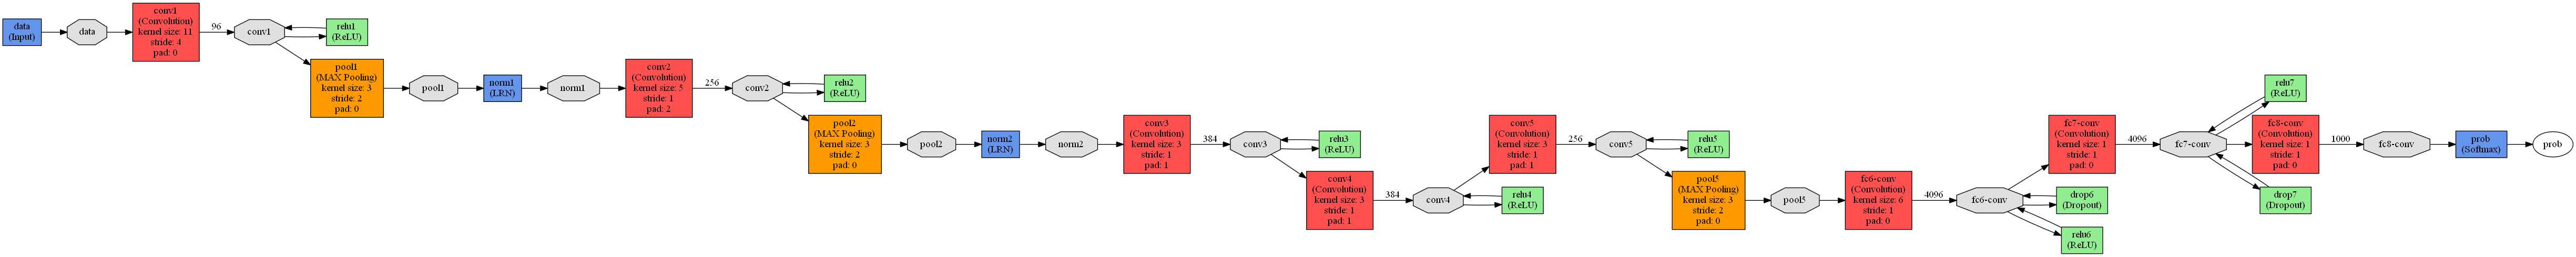

In [9]:
# Draw file location: "C:\Program Files\caffe-master\Build\x64\Release\pycaffe\draw_net.py"
# Net file location: "C:\Program Files\caffe-master\examples\net_surgery\conv.prototxt"

! python "C:\Users\Dallas\DataScience\caffe-master\Build\x64\Release\pycaffe\draw_net.py"\
         "C:\Users\Dallas\DataScience\caffe-master\examples\net_surgery\bvlc_caffenet_full_conv.prototxt"\
          my_net2.png

I_Image(filename = "my_net2.png")

In [ ]:
# Build Neural Net w/ Pre-Trained Model
net = caffe.Net('C:/Users/Dallas/DataScience/caffe-master/models/bvlc_reference_caffenet/deploy.prototxt',
                'C:/Users/Dallas/DataScience/caffe-master/models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel',
                caffe.TEST)

# load data input and configure preprocessing
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_mean('data', np.load('python/caffe/imagenet/ilsvrc_2012_mean.npy').mean(1).mean(1))
transformer.set_transpose('data', (2,0,1))
transformer.set_channel_swap('data', (2,1,0))
transformer.set_raw_scale('data', 255.0)

# Change expected batch size from 10 to 1 since only classifying one image
net.blobs['data'].reshape(1,3,227,227)

#load the image in the data layer
im = caffe.io.load_image('C:\Users\Dallas\DataScience\caffe-master\examples\images\cat.jpg')
net.blobs['data'].data[...] = transformer.preprocess('data', im)

#compute
out = net.forward()

#predicted predicted class
print out['prob'].argmax()

#print predicted labels
labels = np.loadtxt("C:/Users/Dallas/DataScience/caffe-master/data/ilsvrc12/synset_words.txt", str, delimiter='\t')
top_k = net.blobs['prob'].data[0].flatten().argsort()[-1:-6:-1]
print labels[top_k]

## Train Model from Scratch

In [ ]:
solver = caffe.get_solver('C:/Users/Dallas/DataScience/caffe-master/models/bvlc_reference_caffenet/solver.prototxt')